<a href="https://colab.research.google.com/github/ohjisu320/study_data_analytics/blob/main/docs/CDA/CDA_LetalCarOfContractType_univariate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 한글 폰트 설치
- !apt-get install -y fonts-nanum
- !fc-cache -fv
- !rm ~/.cache/matplotlib -rf

  - 설치 후 colab ruddn runtime > restart session 필요

In [31]:
!apt-get install -y fonts-nanum
!fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 32 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

### matplotlib 시각화

In [32]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
mpl.rc('font', family='NanumBarunGothic') # 혹은 다른 설치한 Nanum 폰트 사용

## Load datasets

In [33]:
import pandas as pd

In [34]:
df_LCOCT = pd.read_csv('LetalCarOfContractType.csv')
df_LCOCT[:2]

,id,type_of_contract,type_of_contract2,channel,datetime,Term,payment_type,product,amount,state,overdue_count,overdue,credit rating,bank,cancellation,age,Mileage
0,66758234,렌탈,Normal,서비스 방문,2019-10-20,60,CMS,K1,96900,계약확정,0,없음,9.0,새마을금고,정상,43.0,1862.0
1,66755948,렌탈,Extension_Rental,서비스 방문,2019-10-20,60,카드이체,K1,102900,계약확정,0,없음,2.0,현대카드,정상,62.0,2532.0


## 정규분포 확인: 연속형

### 데이터 건수가 5천개 이상: Anderson normality test
- 대상확인 age : 정규분포이다.


In [35]:
# df_LCOCT_age = df_LCOCT[['age', 'Milleage']].dropna().copy()
df_LCOCT_age = df_LCOCT['age'].dropna().copy() # return datetype Serise class

In [36]:
df_LCOCT_age.count()

40509

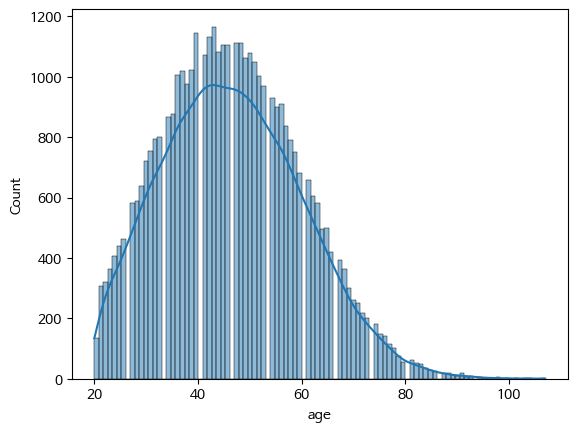

In [37]:
sns.histplot(data=df_LCOCT_age,bins=100, kde=True)
plt.show()

In [38]:
import scipy.stats as stats

In [45]:
# 귀무가설 : 정규분포이다. 대립가설: 정규분포가 아니다.
# 대립가설을 증명하는 p-value가 0.05일 때, critical_values가 0.05보다 큰 0.787임. --> 대립가설이 기각되고 귀무가설이 채택 --> 정규분포임.
statistic, critical_values, significance_level=stats.anderson(df_LCOCT_age)
print(statistic) # 검정통계량 - 비교기준 없어 현재는 사용 불가
print(critical_values) # critical_values <= 0.5, 비정규분포, critical_values > 0.5  정규분포
print(significance_level) # 유의 수준 단계 [0.15  0.10   0.05   0.025  0.01 ]

81.5597210113192
[0.576 0.656 0.787 0.918 1.092]
[15.  10.   5.   2.5  1. ]


### 데이터 건수가 5천건 이하 : shapiro noramlity test
- Mileage[:400] : 정규분포가 아니다.

In [40]:
df_LCOCT_Mileage=df_LCOCT.dropna()[:400]
df_LCOCT_Mileage

,id,type_of_contract,type_of_contract2,channel,datetime,Term,payment_type,product,amount,state,overdue_count,overdue,credit rating,bank,cancellation,age,Mileage
0,66758234,렌탈,Normal,서비스 방문,2019-10-20,60,CMS,K1,96900,계약확정,0,없음,9.0,새마을금고,정상,43.0,1862.0
1,66755948,렌탈,Extension_Rental,서비스 방문,2019-10-20,60,카드이체,K1,102900,계약확정,0,없음,2.0,현대카드,정상,62.0,2532.0
2,66756657,렌탈,Normal,홈쇼핑/방송,2019-10-20,60,CMS,K1,96900,계약확정,0,없음,8.0,우리은행,정상,60.0,2363.0
3,66423450,멤버십,TAS,렌탈재계약,2019-10-20,12,CMS,K1,66900,계약확정,0,없음,5.0,농협은행,정상,60.0,2449.0
4,66423204,멤버십,TAS,렌탈재계약,2019-10-20,12,CMS,K1,66900,해약확정,12,있음,8.0,농협은행,해약,51.0,1942.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503,66423611,멤버십,TAS,렌탈재계약,2019-10-21,12,CMS,K1,87900,계약확정,0,없음,3.0,농협은행,정상,46.0,1978.0
505,66205929,렌탈,Extension_Rental,서비스 방문,2019-10-21,60,CMS,K1,96900,계약확정,0,없음,3.0,신한은행,정상,35.0,1623.0
506,66758687,렌탈,Package,홈쇼핑/방송,2019-10-21,60,CMS,K1,81900,계약확정,0,없음,7.0,농협은행,정상,22.0,1202.0
508,66758021,렌탈,Promotion,서비스 방문,2019-10-21,60,카드이체,K1,111900,계약확정,0,없음,3.0,신한카드,정상,39.0,1760.0


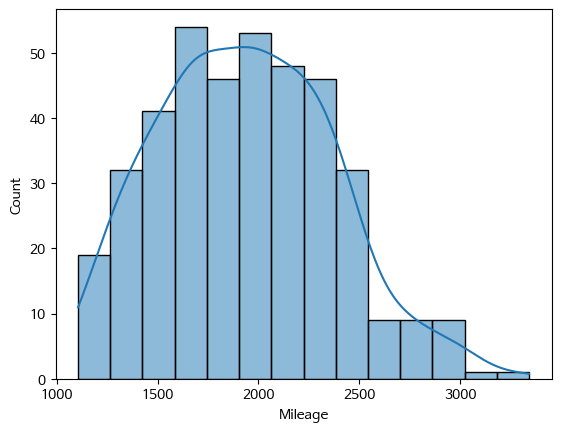

In [42]:
sns.histplot(data=df_LCOCT_Mileage,x='Mileage', kde=True)
plt.show()

In [44]:
# 귀무가설 : 정규분포이다. 대립가설: 정규분포가 아니다.
# 대립가설을 증명하는 p-value 0.001보다도 작음 --> 대립가설이 채택됨 --> 정규분포가 아님
stats.shapiro(df_LCOCT_Mileage['Mileage']) # pvalue가 유의수준보다 작을 시 정규분포 아님

ShapiroResult(statistic=0.9863461852073669, pvalue=0.0008144713356159627)

In [56]:
# 귀무가설 : 정규분포이다. 대립가설: 정규분포가 아니다.
# 대립가설을 증명하는 p-value가 0.05일 때, critical_values가 0.05보다 큰 0.787임. --> 대립가설이 기각되고 귀무가설이 채택 --> 정규분포임.
statistic, critical_values, significance_level =stats.anderson(df_LCOCT['Mileage'].dropna())
print(statistic)
print(critical_values)
print(significance_level)

58.82611209370225
[0.576 0.656 0.787 0.918 1.092]
[15.  10.   5.   2.5  1. ]
